# Word 2 Vec

In [1]:
import codecs
import glob
import logging
import multiprocessing
import os
import pprint
import re

In [2]:
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

C:\Users\aswat\Anaconda3\lib\site-packages\gensim\utils.py:862: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [5]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aswat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aswat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
book_filenames = sorted(glob.glob("datamed/*.txt"))

In [7]:
book_filenames

['datamed\\cure_for_all_diseases.txt']

In [8]:
corpus_raw = u""
for book_filename in book_filenames:
    print("Reading '{0}'...".format(book_filename))
    with codecs.open(book_filename, "r", "utf-8") as book_file:
        corpus_raw += book_file.read()
    print("Corpus is now {0} characters long".format(len(corpus_raw)))
    print()

Reading 'datamed\cure_for_all_diseases.txt'...
Corpus is now 1058698 characters long



# Corpus to sentence

In [9]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [10]:
raw_sentences = tokenizer.tokenize(corpus_raw)

In [11]:
#convert into a list of words
#rtemove unnnecessary,, split into words, no hyphens
#list of words
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ", raw)
    words = clean.split()
    return words

In [12]:
#sentence where each word is tokenized
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [13]:
raw_sentences[5]

'If you have been suffering from a chronic infection or have\ncancer, or AIDS, learn to build the electronic device that will\nstop it immediately.'

In [14]:
sentence_to_wordlist(raw_sentences[5])

['If',
 'you',
 'have',
 'been',
 'suffering',
 'from',
 'a',
 'chronic',
 'infection',
 'or',
 'have',
 'cancer',
 'or',
 'AIDS',
 'learn',
 'to',
 'build',
 'the',
 'electronic',
 'device',
 'that',
 'will',
 'stop',
 'it',
 'immediately']

In [15]:
token_count = sum([len(sentence) for sentence in sentences])
print("The book corpus contains {0:,} tokens".format(token_count))

The book corpus contains 168,137 tokens


# Word 2 Vec

In [16]:
#ONCE we have vectors
#step 3 - build model
#3 main tasks that vectors help with
#DISTANCE, SIMILARITY, RANKING

# Dimensionality of the resulting word vectors.
#more dimensions, more computationally expensive to train
#but also more accurate
#more dimensions = more generalized
num_features = 300
# Minimum word count threshold.
min_word_count = 3

# Number of threads to run in parallel.
#more workers, faster we train
num_workers = multiprocessing.cpu_count()

# Context window length.
context_size = 7

# Downsample setting for frequent words.
#0 - 1e-5 is good for this
downsampling = 1e-3

# Seed for the RNG, to make the results reproducible.
#random number generator
#deterministic, good for debugging
seed = 1

In [32]:

med2vec = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

In [33]:
med2vec.build_vocab(sentences)

2017-10-22 23:35:54,205 : INFO : collecting all words and their counts
2017-10-22 23:35:54,208 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-10-22 23:35:54,243 : INFO : PROGRESS: at sentence #10000, processed 133881 words, keeping 10837 word types
2017-10-22 23:35:54,252 : INFO : collected 12439 word types from a corpus of 168137 raw words and 12447 sentences
2017-10-22 23:35:54,253 : INFO : Loading a fresh vocabulary
2017-10-22 23:35:54,280 : INFO : min_count=3 retains 5509 unique words (44% of original 12439, drops 6930)
2017-10-22 23:35:54,282 : INFO : min_count=3 leaves 159146 word corpus (94% of original 168137, drops 8991)
2017-10-22 23:35:54,304 : INFO : deleting the raw counts dictionary of 12439 items
2017-10-22 23:35:54,306 : INFO : sample=0.001 downsamples 40 most-common words
2017-10-22 23:35:54,308 : INFO : downsampling leaves estimated 128947 word corpus (81.0% of prior 159146)
2017-10-22 23:35:54,309 : INFO : estimated required memory fo

In [34]:
print("Word2Vec vocabulary length:", len(med2vec.wv.vocab))

Word2Vec vocabulary length: 5509


In [35]:
med2vec.train(sentences, total_examples=token_count,epochs=100)

2017-10-22 23:36:07,412 : INFO : training model with 4 workers on 5509 vocabulary and 300 features, using sg=1 hs=0 sample=0.001 negative=5 window=7
2017-10-22 23:36:08,454 : INFO : PROGRESS: at 0.10% examples, 172522 words/s, in_qsize 8, out_qsize 0
2017-10-22 23:36:09,494 : INFO : PROGRESS: at 0.22% examples, 181944 words/s, in_qsize 7, out_qsize 0
2017-10-22 23:36:10,504 : INFO : PROGRESS: at 0.35% examples, 199586 words/s, in_qsize 7, out_qsize 0
2017-10-22 23:36:11,515 : INFO : PROGRESS: at 0.48% examples, 204674 words/s, in_qsize 7, out_qsize 0
2017-10-22 23:36:12,532 : INFO : PROGRESS: at 0.61% examples, 207230 words/s, in_qsize 7, out_qsize 0
2017-10-22 23:36:13,580 : INFO : PROGRESS: at 0.74% examples, 208027 words/s, in_qsize 7, out_qsize 0
2017-10-22 23:36:14,584 : INFO : PROGRESS: at 0.86% examples, 208888 words/s, in_qsize 7, out_qsize 0
2017-10-22 23:36:15,600 : INFO : PROGRESS: at 0.96% examples, 205358 words/s, in_qsize 6, out_qsize 1
2017-10-22 23:36:16,630 : INFO : PR

12895768

In [36]:
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [37]:
all_word_vectors_matrix = med2vec.wv.syn0

In [38]:
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [39]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[thrones2vec.wv.vocab[word].index])
            for word in thrones2vec.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [40]:
points.tail(10)

,word,x,y
5499,Company,0.975493,-13.046385
5500,Ward,0.985299,-13.066970
5501,Scientific,1.005499,-13.149881
5502,Kroeger,1.126745,-13.184502
5503,Rd,1.030589,-13.169408
5504,IL,0.891219,-13.207950
5505,retail,1.078617,-13.188822
5506,wholesale,1.066523,-13.186170
5507,NY,1.016036,-13.154723
5508,University,1.745756,-12.251929


In [41]:
sns.set_context("poster")

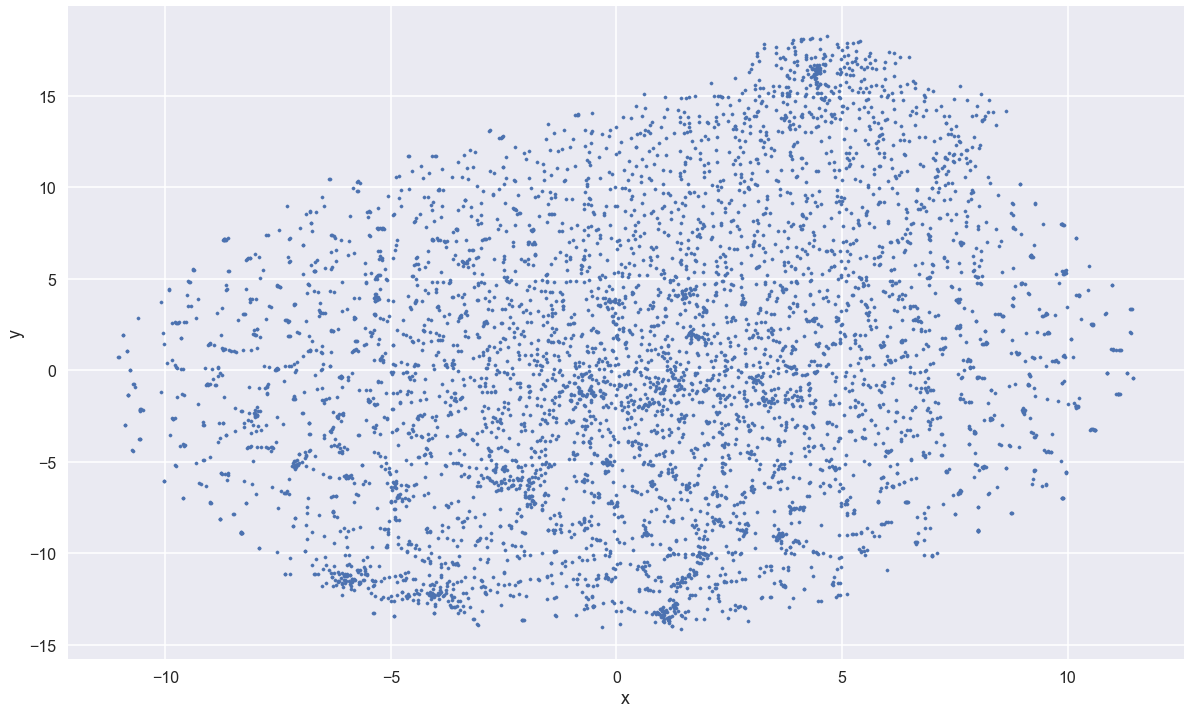

In [42]:
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [43]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

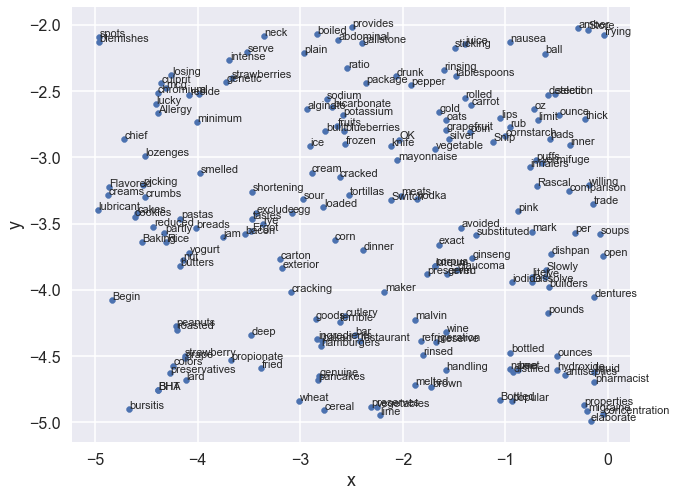

In [44]:
plot_region(x_bounds=(-5, 0), y_bounds=(-5, -2))

In [45]:
med2vec.most_similar("Schizophrenia")

2017-10-22 23:40:14,238 : INFO : precomputing L2-norms of word weight vectors


[('Memory', 0.5120952725410461),
 ('schizophrenic', 0.49371641874313354),
 ('Digestion', 0.4476219415664673),
 ('Loss', 0.43053901195526123),
 ('Burning', 0.4255186915397644),
 ('Depression', 0.41263455152511597),
 ('Numbness', 0.39762598276138306),
 ('considering', 0.39118605852127075),
 ('asteroides', 0.3822438418865204),
 ('Rash', 0.37724751234054565)]

In [58]:
med2vec.most_similar("Kidney")

[('Cleanse', 0.7932115197181702),
 ('Liver', 0.39603736996650696),
 ('Constipation', 0.37994831800460815),
 ('liter', 0.36862286925315857),
 ('Emmenagogue', 0.36607271432876587),
 ('Weight', 0.3572428822517395),
 ('Hydrangea', 0.35364896059036255),
 ('Gravel', 0.35312679409980774),
 ('Bile', 0.3419802784919739),
 ('Feeling', 0.3382059335708618)]

In [47]:
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = thrones2vec.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2

In [57]:
nearest_similarity_cosmul("flu", "influenza", "AIDS")

flu is related to influenza, as HIV is related to AIDS


'HIV'

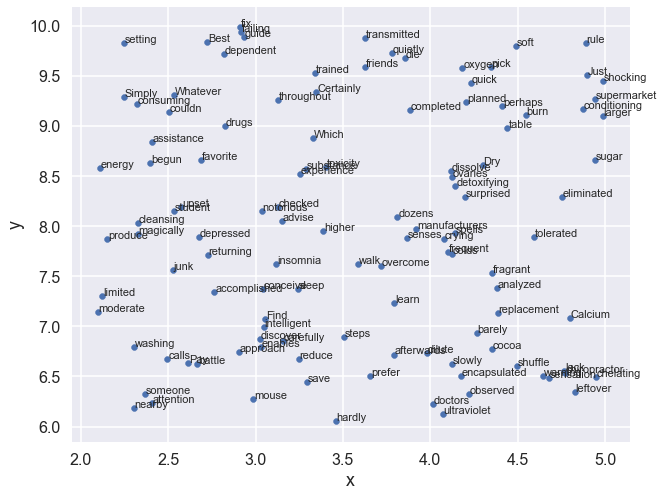

In [59]:
plot_region(x_bounds=(2, 5), y_bounds=(6, 10))